# Funciones de Pérdida

### Funciones de Pérdida de Regresión

Vamos a comparar cómo diferentes funciones de pérdida afectan al rendimiento de un modelo `SGDRegressor` entrenado en el conjunto de datos anterior.

Las funciones de pérdida que vamos a analizar son:


1. **L2**:
    - La pérdida cuadrática penaliza los errores grandes mucho más que los pequeños debido al término cuadrático.
    - Fórmula:
    $$
    \mathcal{L}(y, \hat{y}) = || y^{(i)} - \hat{y}^{(i)} ||_2^2 =  \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2
    $$

2. **L1**:
    - Comparada con la L2,  penaliza menos los errores grandes (linealmente) y penaliza más los errores pequeños.
    - Fórmula:
    $$
    \mathcal{L}(y, \hat{y}) = || y^{(i)} - \hat{y}^{(i)} ||_1 =  \sum_{i=1}^{m} |y^{(i)} - \hat{y}^{(i)}|
    $$

   
3. **Huber**:
    - Combina la L2 y L1, utilizando L2 para errores pequeños y L1 para errores grandes.
    - Fórmula:
    $$
    \mathcal{L}(y, \hat{y}) =
    \begin{cases}
    \frac{1}{2}(y - \hat{y})^2 & \text{si } |y - \hat{y}| \leq \delta \\
    \delta |y - \hat{y}| - \frac{1}{2}\delta^2 & \text{si } |y - \hat{y}| > \delta
    \end{cases}
    $$

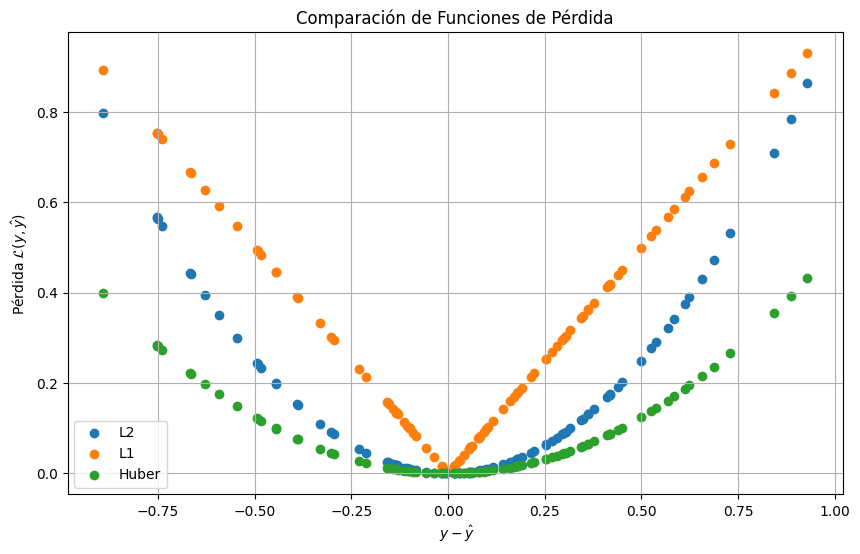

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#################################### COMPLETAR ####################################
# Define la pérdida L2
def l2loss(y_true, y_pred):
    return (y_true - y_pred)**2

#################################### COMPLETAR ####################################
# Define la pérdida L1
def l1loss(y_true, y_pred):
    return (np.abs(y_true - y_pred))

#################################### COMPLETAR ####################################
# Define la pérdida Uber
def huber_loss(y_true, y_pred, delta=1.0):
    return np.where(np.abs(y_true -y_pred)<=delta,0.5 * (y_true - y_pred)**2, delta * np.abs(y_true - y_pred) - 0.5 * delta**2)

#################################### COMPLETAR ####################################
# Da valores de ejemplo para y_true y y_pred
y_true = np.random.rand(100)
y_pred = np.random.rand(100)
#################################### COMPLETAR ####################################
# Calcula las pérdidas para cada función
l2loss_v = l2loss(y_true, y_pred)
l1loss_v = l1loss(y_true, y_pred)
huber_loss_v = huber_loss(y_true, y_pred)

#################################### COMPLETAR ####################################
# Visualiza los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_true - y_pred, l2loss_v, label='L2')
plt.scatter(y_true - y_pred, l1loss_v, label='L1')
plt.scatter(y_true - y_pred, huber_loss_v, label='Huber')

plt.xlabel(" $y - \hat{y}$")
plt.ylabel("Pérdida $\mathcal{L}(y, \hat{y})$")
plt.title("Comparación de Funciones de Pérdida")
plt.legend()
plt.grid(True)
plt.show()

### Funciones de Pérdida de Clasificación

1. **Pérdida Logística**:
   - Utilizada en problemas de clasificación probabilística. Penaliza más las predicciones erróneas confiadas.
   - Fórmula:
   $$
   \mathcal{L}(y, \hat{y}) = y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})
   $$

2. **Hinge**:
   - Utilizada en SVM, penaliza predicciones incorrectas dentro del margen.
   - Fórmula:
   $$
   \mathcal{L}(y, \hat{y})=  \max(0, 1 - y \cdot \hat{y})
   $$

3. **Perceptron Loss**:
   - Penaliza predicciones incorrectas sin margen.
   - Fórmula:
   $$
   \mathcal{L}(y, \hat{y})=  \max(0, -y \cdot \hat{y})
   $$

4. **Binomial**:
   - Similar a la logística. Penaliza las predicciones basadas en la desviación binomial entre las probabilidades reales y predichas.
   - Fórmula:
   $$
   \mathcal{L}(y, \hat{y}) = \log\left(1 + \exp(-y \cdot \hat{y})\right)
   $$

6. **Pérdida Exponencial**:
   - Penaliza fuertemente los errores grandes.
   - Fórmula:
   $$
   \mathcal{L}(y, \hat{y}) =\exp(-y \cdot \hat{y})
   $$

<ipython-input-3-f886eed07d7a>:4: RuntimeWarning: invalid value encountered in log
  return y_true * np.log(y_pred) + (1-y_true) * np.log(1 - y_true)


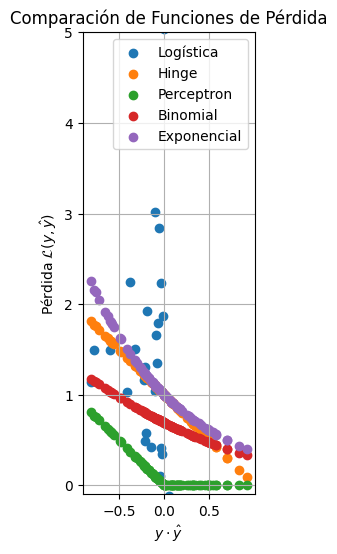

In [3]:
#################################### COMPLETAR ####################################
# Define la pérdida Logística
def logloss(y_true, y_pred):
  return y_true * np.log(y_pred) + (1-y_true) * np.log(1 - y_true)
#################################### COMPLETAR ####################################
# Define la pérdida Hinge
def hingeloss(y_true, y_pred):
  return np.maximum(0, 1-y_true*y_pred)

#################################### COMPLETAR ####################################
# Define la pérdida Perceptrón
def perceptronloss(y_true, y_pred):
  return np.maximum(0, -y_true*y_pred)


#################################### COMPLETAR ####################################
# Define la pérdida Binomial
def binomialloss(y_true, y_pred):
  return np.log(1+ np.exp(-y_true * y_pred))

#################################### COMPLETAR ####################################
# Define la pérdida Exponencial
def exploss(y_true, y_pred):
  return np.exp(-y_true*y_pred)


#################################### COMPLETAR ####################################
# Da valores de ejemplo para y_true y y_pred
y_true = np.random.uniform(-1,1, size=100)
y_pred = np.random.uniform(-1,1, size=100)

#################################### COMPLETAR ####################################
# Calcula las pérdidas para cada función
logloss_v = logloss(y_true, y_pred)
hingeloss_v = hingeloss(y_true, y_pred)
perceptronloss_v = perceptronloss(y_true, y_pred)
binomialloss_v = binomialloss(y_true, y_pred)
exploss_v = exploss(y_true, y_pred)

#################################### COMPLETAR ####################################
# Visualiza los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_true*y_pred, logloss_v, label='Logística')
plt.scatter(y_true*y_pred, hingeloss_v, label='Hinge')
plt.scatter(y_true*y_pred, perceptronloss_v, label='Perceptron')
plt.scatter(y_true*y_pred, binomialloss_v, label='Binomial')
plt.scatter(y_true*y_pred, exploss_v, label='Exponencial')

# Configuración del gráfico
plt.xlabel("$y \cdot\hat{y}$")
plt.ylabel("Pérdida $\mathcal{L}(y, \hat{y})$")
plt.title("Comparación de Funciones de Pérdida")
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal')
plt.ylim([-0.1,5])
plt.show()

### Comparación de Funciones de Pérdida en `SGDRegressor`

Vamos a comparar cómo diferentes funciones de pérdida afectan al rendimiento de un modelo `SGDRegressor` entrenado en el conjunto de datos anterior.


Comenzamos generando datos. Crea unos datos ruidosos a partir de la siguiente función:
$$
y = 2x +1 \eta, \quad \eta \sim \mathcal{N}(0,1),
$$
y, además, añade algunos *outliers* al conjunto de puntos generado.

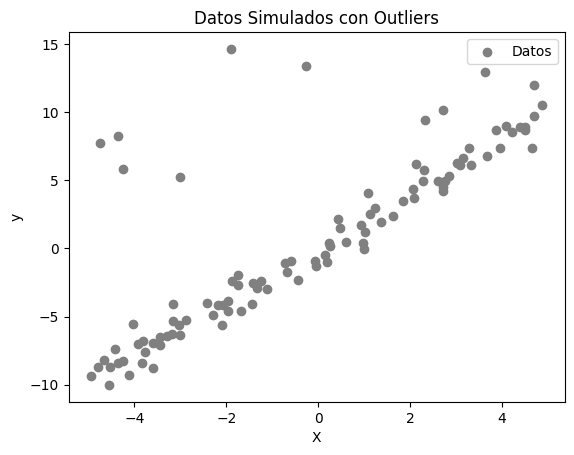

In [16]:
import numpy as np
import matplotlib.pyplot as plt

#################################### COMPLETAR ####################################
# Generar datos
np.random.seed(42)
n=100
X= np.random.uniform(-5,5,size=n)
noise= np.random.normal(0,1,size=n)
y= 2*x + noise

#################################### COMPLETAR ####################################
# Introducir algunos outliers
n_outliers = 10
ind_outliers= np.random.choice(n, n_outliers, replace=False)
y[ind_outliers]= np.random.uniform(5,15, size=n_outliers)


#################################### COMPLETAR ####################################
# Visualizar
plt.scatter(X, y, color='gray', label='Datos')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Datos Simulados con Outliers")
plt.legend()
plt.show()

\Ahora, importa `SGRegressor` y ajusta los datos anteriores utilizando

distintas funciones de pérdida predeterminadas.

Usando función de pérdida: huber
Usando función de pérdida: squared_error
Usando función de pérdida: epsilon_insensitive
Usando función de pérdida: squared_epsilon_insensitive


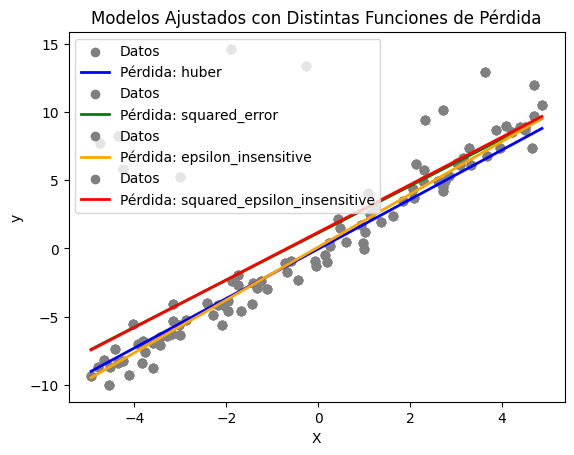

In [26]:
#################################### COMPLETAR ####################################
# Importa SGDRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

#################################### COMPLETAR ####################################
# Entrena varios modelos con los datos anteriores usando distintas funciones
X= X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Lista de funciones de pérdida para probar
loss_functions = {'huber', 'squared_error', 'epsilon_insensitive', 'squared_epsilon_insensitive'}
colors = ['blue', 'green', 'orange', 'red']  # Colores para cada modelo
predictions = []



for loss , color  in zip(loss_functions, colors):
    print(f"Usando función de pérdida: {loss}")

    # Crear y ajustar el modelo de SGD con la función de pérdida específica
    sgd_reg = SGDRegressor(loss=loss, max_iter=1000)
    sgd_reg.fit(X_train, y_train)

    # Predicción con el modelo entrenado
    y_pred = sgd_reg.predict(X_test)
    predictions.append((loss, sgd_reg.coef_
                        , sgd_reg.intercept_ ))

    # Crear línea de regresión usando coeficientes ajustados
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Rango de X para la línea de regresión
    y_pred_line = sgd_reg.predict(x_range)

    plt.scatter(X, y, color='gray', label='Datos')

    # Graficar la línea de regresión
    plt.plot(x_range, y_pred_line, color=color, label=f'Pérdida: {loss}', linewidth=2)

# Configuración del gráfico
plt.xlabel("X")
plt.ylabel("y")
plt.title("Modelos Ajustados con Distintas Funciones de Pérdida")
plt.legend()
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px; font-style: italic;">
  ¿Qué puedes concluir de los modelos resultantes?
</div>

La pérdida cuadrática `squared_error` y squared_epsilon_insensitive `código insertado` son más sensibles a outliers, ya que la penalización cuadrática amplifica el impacto de errores grandes. Por otro lado, la pérdida `Huber` y `epsilon_insensitive` son menos afectadas por los outliers, ofreciendo un ajuste más robusto.


